There are two types of KNN imputer as follows:

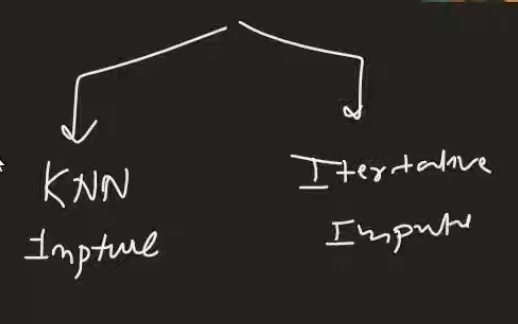

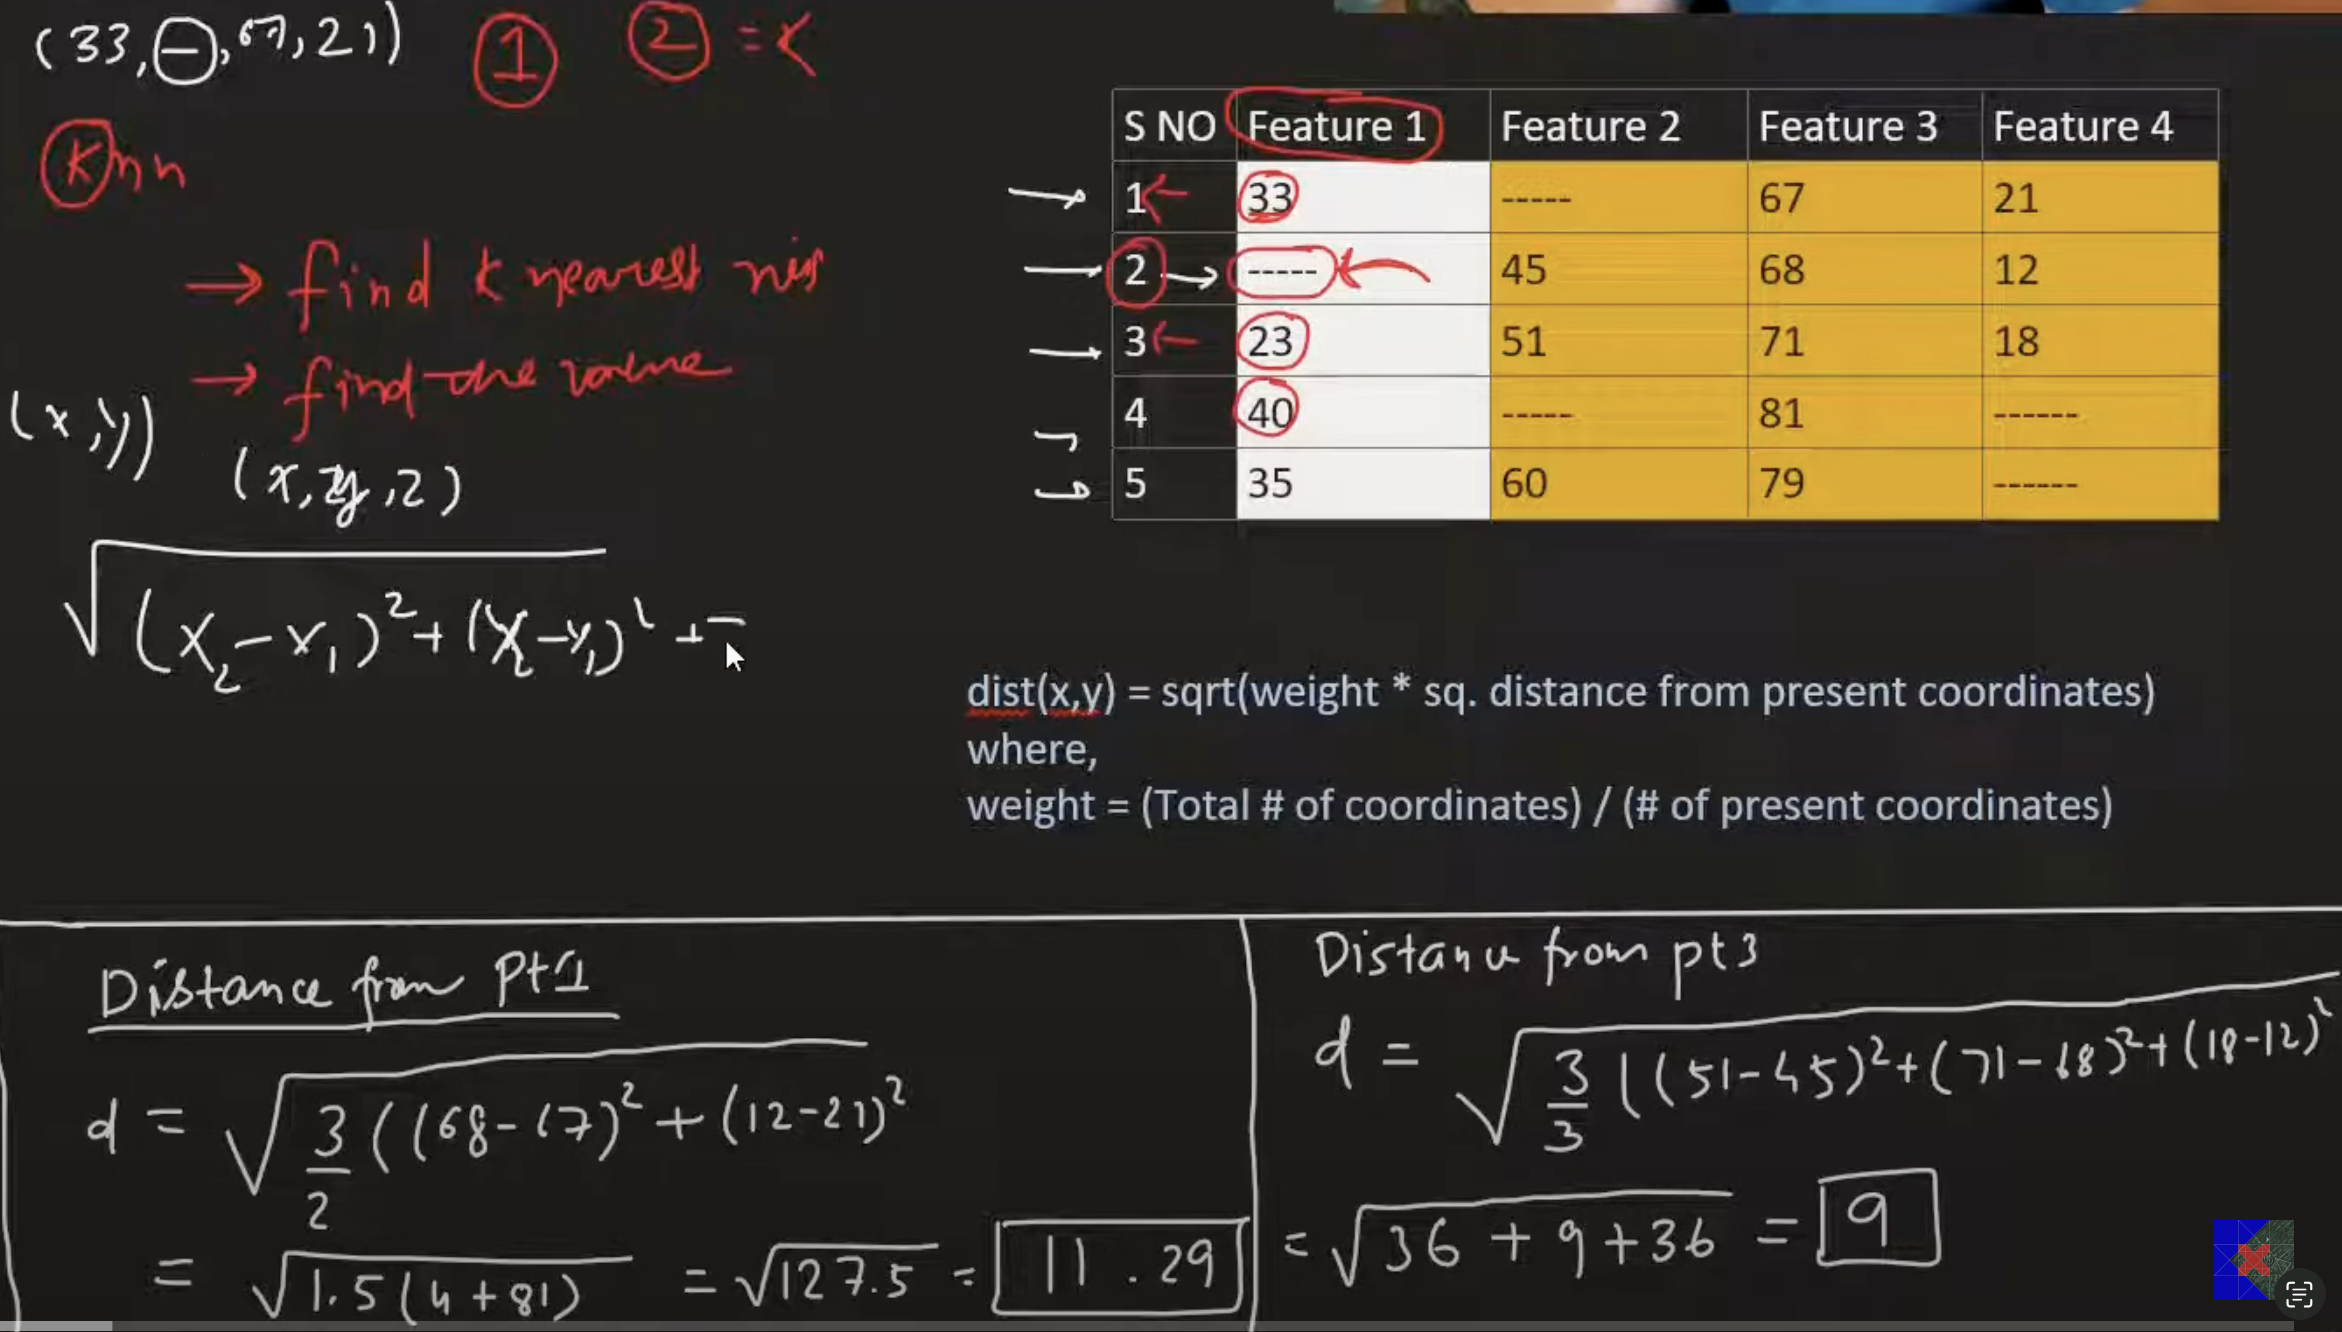

But there can be a missing values in the rows, so there is a another distance called Nan-Euclidean distance. This distance handles NAN values.
Updated formula link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.nan_euclidean_distances.html
Any missing value in the pair, that pair is ignored.

Example of Nan distance between row 1 and row 2. Feature 1 is target variable thats why its not considered in the ratio.

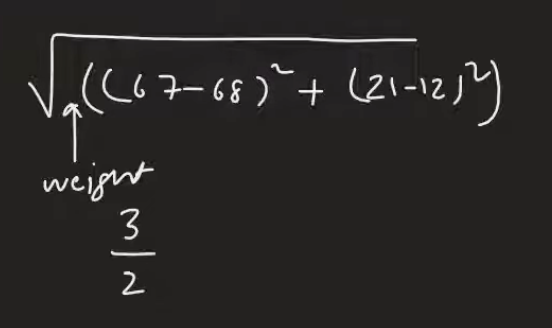

Exmaple of Nan distance between row 2 and row 3
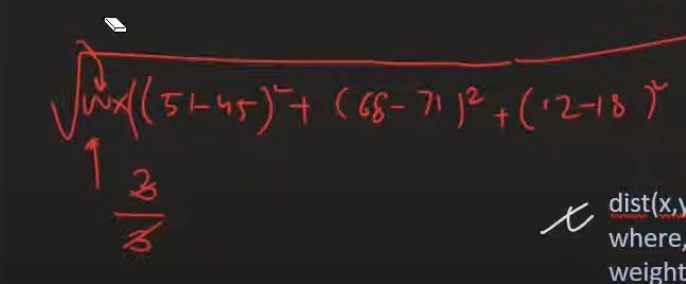

Example between Row 2 and Row 4
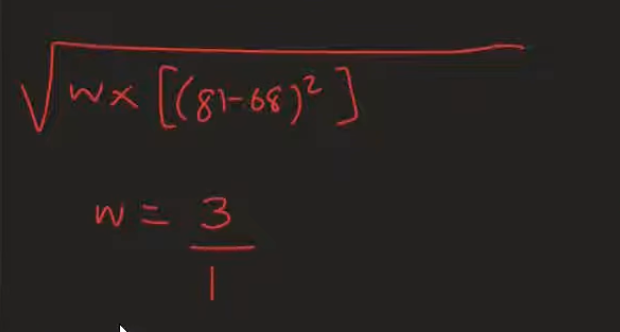

Suppose K = 2
We are calucalting distance from row 2.
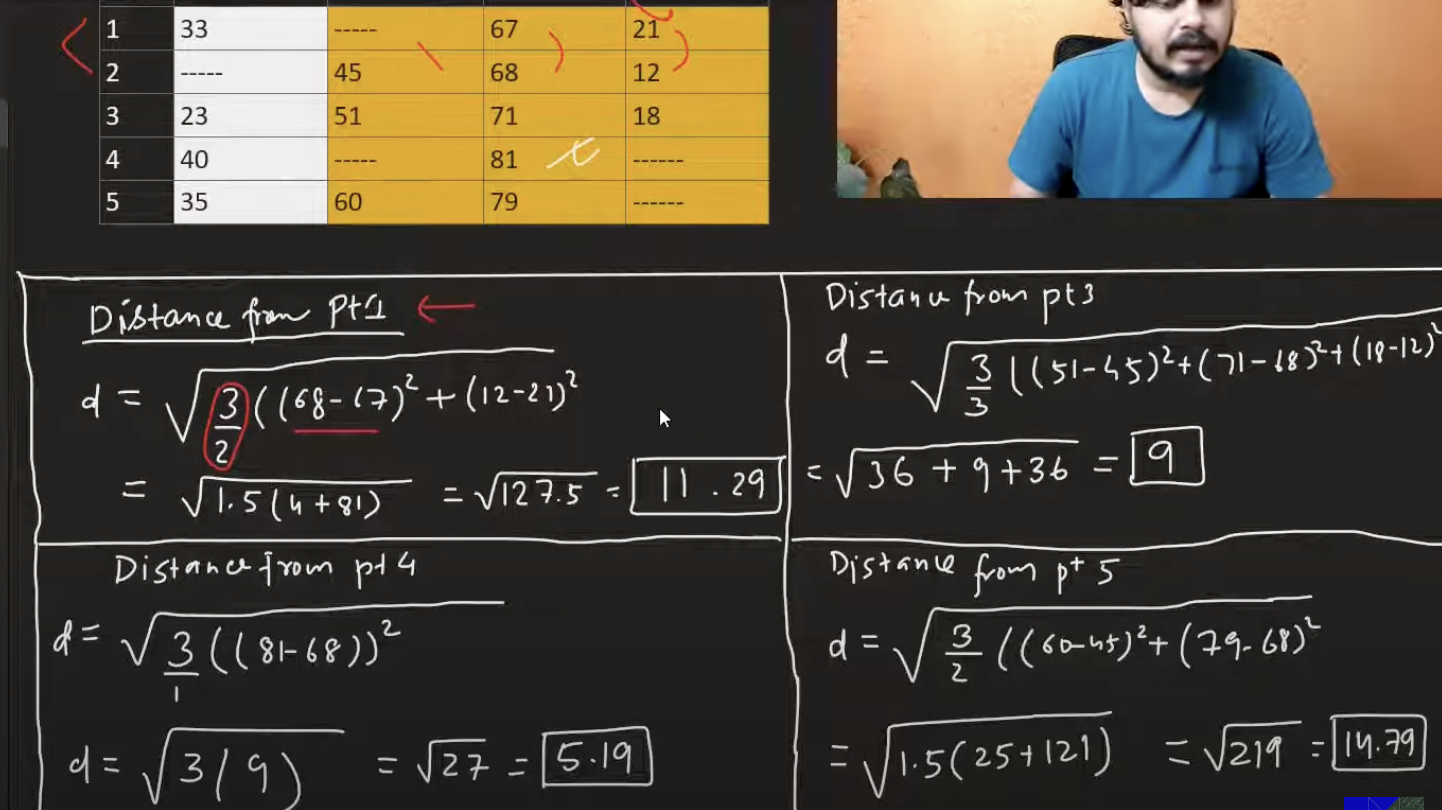

So the closet neighbour would be row 3 and row 4. Based on the above calculation.
SO the missing value for row 2 will be (23+40)/2 =. 31.5

# Advantages
- It is very accurate, and gives better result.

# Disadvantages
- It has many calculation, which increase the computation time.
- When deploying this algorith, We need to deploy the entire training set data.


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("train_titantic.csv", usecols = ['Age', 'Pclass', 'Fare', 'Survived'])

In [3]:
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [4]:
df.isnull().mean()*100

Survived     0.00000
Pclass       0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [5]:
# Splitting training and test data
X = df.drop('Survived', axis = 1)
Y = df['Survived']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   Y,
                                                   test_size = 0.2,
                                                   random_state = 1)

https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html

In [7]:
# By default Neighbours = 5
# By default weight = uniform
# By defuat metric =. nan euclidean 
knn = KNNImputer()

X_train_trf = knn.fit_transform(X_train)
X_test_trf = knn.transform(X_test)

In [11]:
pd.DataFrame(X_train_trf, columns = X_train.columns)

,Pclass,Age,Fare
0,3.0,27.6,23.2500
1,1.0,30.0,56.9292
2,2.0,34.0,10.5000
3,2.0,21.0,73.5000
4,2.0,62.0,10.5000
...,...,...,...
707,3.0,19.0,7.6500
708,3.0,30.5,7.7500
709,2.0,21.0,73.5000
710,3.0,25.0,7.5500


In [14]:
lr = LogisticRegression()

lr.fit(X_train_trf, y_train)
y_pred = lr.predict(X_test_trf)

accuracy_score(y_test, y_pred)

0.6759776536312849

In [15]:
# Compare with simple imputer mean

si = SimpleImputer()

X_train_trf2 = si.fit_transform(X_train)
X_test_trf2 = si.transform(X_test)

In [16]:
lr = LogisticRegression()

lr.fit(X_train_trf2, y_train)
y_pred2 = lr.predict(X_test_trf2)

accuracy_score(y_test, y_pred2)

0.6703910614525139

In [21]:
# On iterating the distance
accuracy_best = 0
k = 0
we = ""
for i in range(1, 13):
    
    # Iterating with weights
    for w in ["uniform", "distance"]:
        knn = KNNImputer(n_neighbors = i, weights = w)

        X_train_trf3 = knn.fit_transform(X_train)
        X_test_trf3 = knn.transform(X_test)

        lr = LogisticRegression()

        lr.fit(X_train_trf3, y_train)
        y_pred3 = lr.predict(X_test_trf3)
        
        if accuracy_best < accuracy_score(y_test, y_pred3):
            k = i
            we = w
            accuracy_best = accuracy_score(y_test, y_pred3)   
    
        
        
print("Neighbors = ", k, "accuracy =" , accuracy_best, "weight = ", we)

Neighbors =  2 accuracy = 0.6871508379888268 weight =  uniform


## What does distance do in weights?

The given is the distance from 3rd row. Stating that row 1 and row 4 are closet based on euclidean distance. 
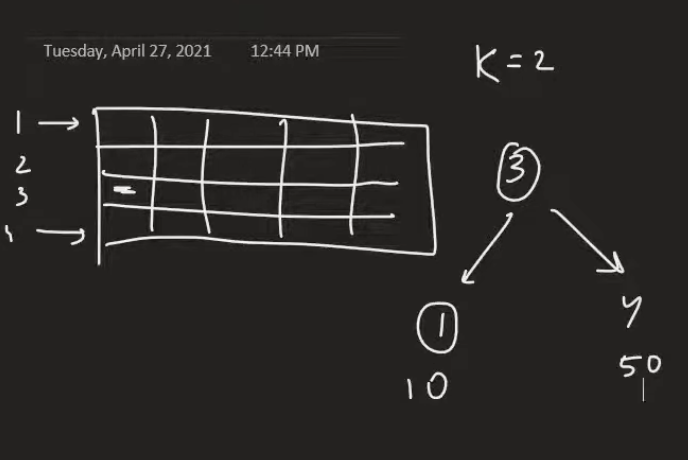

Now there are two ways of calculating:

**Uniform**: In this method equal weightge.
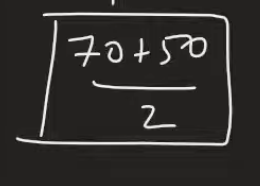

**distance**: In this method we give more weighatge to the point closer.
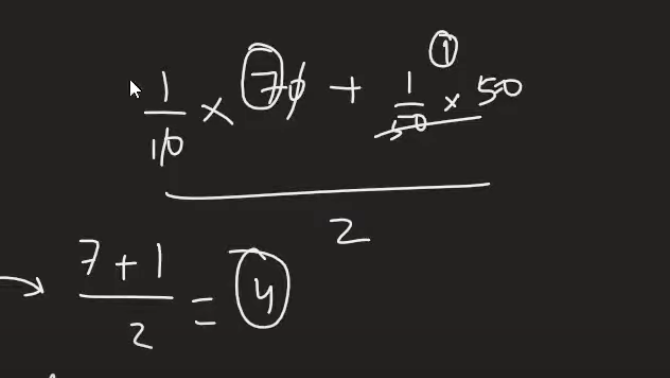